In [172]:
import matplotlib.pyplot as plt 
from scipy.stats import gamma, beta, t
import pandas as pd
import seaborn as sns
from scipy import stats
import numpy as np

# 1. Density Estimation

### This is some sample data

In [173]:
actual_data = [5, 12, 22, 400, 800, 120, 70, 30, 23, 22, 10, 1 ]

### Fitting a Beta Distribution to the data

In [174]:
actual_a, actual_b, actual_loc, actual_scale = beta.fit(actual_data)

print('Beta distribution parameters are', actual_a, actual_b, actual_loc, actual_scale)

Beta distribution parameters are 0.13941265318308266 0.49629629823818583 0.9999999999999999 832.731192541219


/home/sandeep/miniconda3/envs/sdv/lib/python3.8/site-packages/scipy/stats/_continuous_distns.py:621: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


In [175]:
synthetic_data_beta = beta.rvs(actual_a, actual_b ,loc=actual_loc,scale=actual_scale,size=len(actual_data))

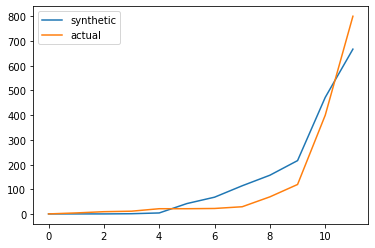

In [176]:
plt.plot(sorted(synthetic_data_beta), label='synthetic')
plt.plot(sorted(actual_data), label='actual')
plt.legend()
plt.show()

### Kernel density estimation

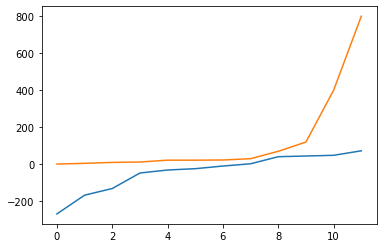

In [177]:


kernel = stats.gaussian_kde(actual_data, bw_method='silverman') # or try scott, or numeric 1, 2
synthetic_kde_data = kernel.resample(len(actual_data))


plt.plot(sorted(synthetic_kde_data[0]), label='synthetic')
plt.plot(sorted(actual_data), label='actual')
plt.show()

# 2. Covariance and Correlation

Covariance = measure if elements from two arrays move in the same direction

correlation = normalized covariance (always between -1 and 1)

In [178]:
print(actual_data)

[5, 12, 22, 400, 800, 120, 70, 30, 23, 22, 10, 1]


In [179]:
correlation_dict = {'Speed': sorted(actual_data), 
                      'Age': np.sort(actual_data)[::-1] } 

df = pd.DataFrame.from_dict(negative_corr_dict) 

In [180]:
print(df.head(len(actual_data)))

    speed  age
0       1  800
1       5  400
2      10  120
3      12   70
4      22   30
5      22   23
6      23   22
7      30   22
8      70   12
9     120   10
10    400    5
11    800    1


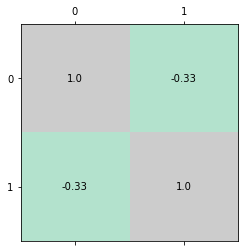

In [181]:
fig, ax = plt.subplots()

ax.matshow(synthetic_df.corr().values, cmap=plt.cm.Pastel2)

for i in range(2):
    for j in range(2):
        c = round(synthetic_df.corr().values[j,i], 3)
        ax.text(i, j, str(c), va='center', ha='center')

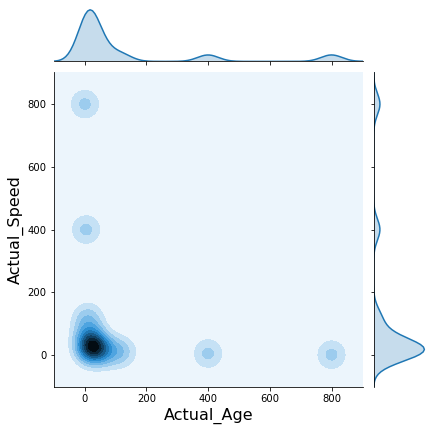

In [182]:

h = sns.jointplot(df.age, df.speed, kind='kde', stat_func=None);
h.set_axis_labels('Actual_Age', 'Actual_Speed',  fontsize=16);

In [192]:
mvnorm = stats.multivariate_normal(mean=[0, 0], cov=negative_df.corr().values)
x = mvnorm.rvs(500)

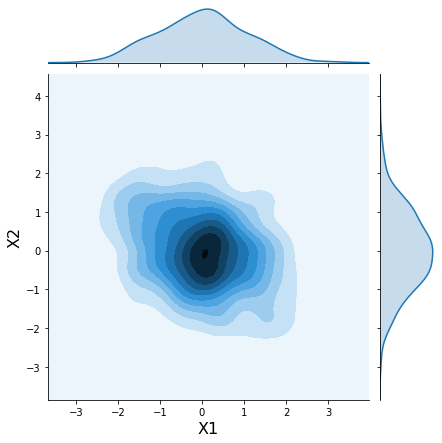

In [193]:
h = sns.jointplot(x[:, 0], x[:, 1], kind='kde', stat_func=None);
h.set_axis_labels('X1', 'X2', fontsize=16);

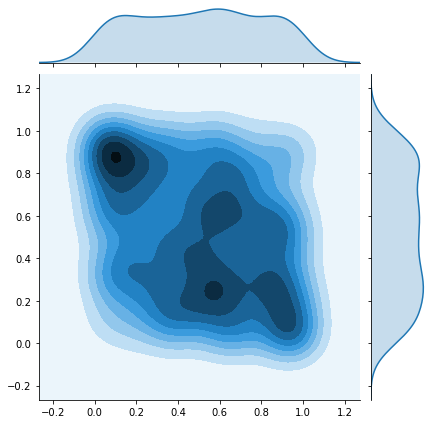

In [194]:
norm = stats.norm()
x_unif = norm.cdf(x)

h = sns.jointplot(x_unif[:, 0], x_unif[:, 1], kind='kde', stat_func=None)

In [195]:
age_distribution = stats.beta(a=actual_a, b=actual_b)  # Age column
speed_distribution = stats.beta(a=actual_a, b=actual_b)  # Speed column

### this is your synthetic data with desired distribution and covariance


In [196]:
age_ppf = age_distribution.ppf(x_unif[:, 0])
speed_ppf = speed_distribution.ppf(x_unif[:, 1])

In [197]:
synthetic_df = pd.DataFrame({'synthetic_age' : age_ppf, 'synthetic_speed' : speed_ppf})

### matches the original covariance above

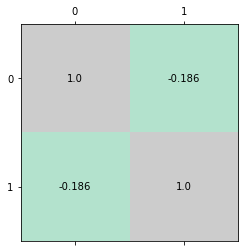

In [198]:
#plt.matshow(synthetic_df.corr().values)

fig, ax = plt.subplots()

ax.matshow(synthetic_df.corr().values, cmap=plt.cm.Pastel2)

for i in range(2):
    for j in range(2):
        c = round(synthetic_df.corr().values[j,i], 3)
        ax.text(i, j, str(c), va='center', ha='center')

In [199]:
print(synthetic_df.head())

   synthetic_age  synthetic_speed
0   2.340012e-06         0.116409
1   8.175512e-13         0.937880
2   1.852776e-02         0.000005
3   7.922991e-01         0.231255
4   4.806850e-02         0.837173


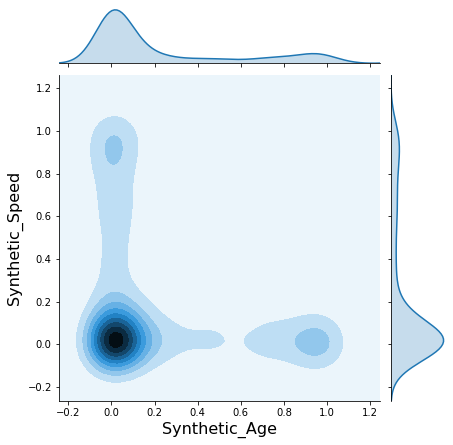

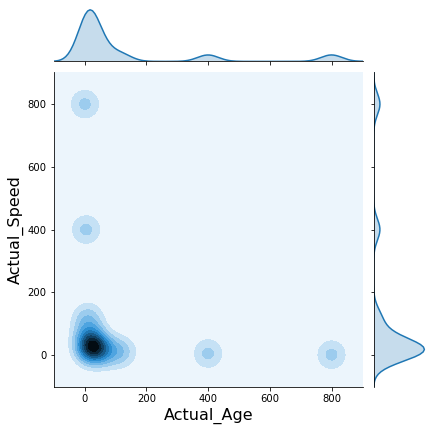

In [200]:

h = sns.jointplot(age_ppf, speed_ppf, kind='kde', stat_func=None);
h.set_axis_labels('Synthetic_Age', 'Synthetic_Speed',  fontsize=16);

h = sns.jointplot(df.age, df.speed, kind='kde', stat_func=None);
h.set_axis_labels('Actual_Age', 'Actual_Speed',  fontsize=16);